## Trabajo práctico N°1: Modelo de predadores y prezas de Lotka-Volterra

El sisitema de dos ecuaciones diferenciales ordinarias definido como:

$R'(t) = a\ R(t) - b\ R(t)\ F(t)$

$F'(t) = -c\ F(t) + d\ R(t)\ F(t)$

es conocido como **Modelo de predadores y prezas de Lotka-Volterra**. La función $R(t)$ modela el
número de conejos en un ecosistema dado, y $F(t)$ la cantidad de zorros en el mismo ecosistema.

**a)**  Usando el método de Runge-Kutta de cuarto orden, econtrá una solución numérica aproximada a dicho problema para el caso particular en que los parámetros toman los siguientes valores: $a = 0.1$, $b = 0.02$, $c = 3$ y $d = 0.01$, con un paso de integración $h = 0.05$, entre $t = 0$ y $t = 200$, para las condiciones iniciales $x(0) = 40$ y $y(0) = 9$.

Tomo $R(t) = x$, variable dependiente; y $F(t) = y$, variable dependiente.
Para integrar $R'(t) = a\ R(t) - b\ R(t)\ F(t)$, 
Dado que $a=0.1$ y $b=0.02$,   $R'(t) = 0.1\ R(t) - 0.02\ R(t)\ F(t)$

Luego, $f(x_i, y_{i}) = 0.1\ x_i - 0.02\ x_i y_i $

Para el caso de $F'(t) = -c\ F(t) + d\ R(t)\ F(t)$, también tomo $F(t) = y$, variable dependiente; y $R(t) = x$, variable independiente.

Dado que $c=3$ y $d=0.01$,   $F'(t) = -3\ F(t) + 0.01\ R(t)\ F(t)$

Luego, $f(x_i, y_{i}) = -3\ y_i + 0.01\ x_i y_i $

Para resolverlas, voy a emplear el Método clásico de Runge-Kutta de cuarto orden:

$y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h$

donde:

$k_1 = f(x_i, y_i)$

$k_2 = f(x_i+\frac{1}{2}h, y_i+\frac{1}{2}k_1h)$

$k_3 = f(x_i+\frac{1}{2}h, y_i+\frac{1}{2}k_2h)$

$k_4 = f(x_i+h, y_i+k_3h)$

In [35]:
import matplotlib.pyplot as plt
import numpy as np
#https://mat.caminos.upm.es/wiki/Modelo_Depredador-Presa_de_Lotka-Volterra_(grupo_16)
class RungeKutta4:
    def __init__(self, x0, y0, h, t_start, t_end, funX, funY, *args):
        # Condiciones iniciales
        self.x0 = x0 
        self.y0 = y0
        self.h = h # Paso de integración
       # self.f = f # Función a integrar
        # Integrar desde t_start hasta t_end
        self.t_start = t_start  
        self.t_end = t_end
        ## Coeficientes k1, k2, k3, k4
        self.k1 = 0
        self.k2 = 0
        self.k3 = 0
        self.k4 = 0
        self.myargs = args
        self.fX = funX
        self.fY = funY
        self.graph = []
        
    def f(self, n):
        if(n == 1):
            return self.fX(*self.myargs)
        elif(n== 2):
            return self.fY(*self.myargs)
        
    
    def coefsK(self, x, y, h, n):
        # Calcula los coeficientes
        self.setXY(x,y)
        self.k1 = self.f(n)
        self.setXY(x+.5*self.h, y+.5*self.k1*self.h)
        self.k2 = self.f(n)
        self.setXY(x+.5*self.h, y+.5*self.k2*self.h)
        self.k3 = self.f(n)
        self.setXY(x+self.h, y+self.k3*self.h)
        self.k4 = self.f(n)
        
    def solve(self):
        
        t = self.t_start
        while(t <= self.t_end):
            self.coefsK(self.x0, self.y0, self.h, 1)
            temp_x0 = self.h/6*(self.k1 + 2*self.k2 + 2*self.k3 + self.k4)
            self.coefsK(self.x0, self.y0, self.h, 2)
            temp_y0 = self.h/6*(self.k1 + 2*self.k2 + 2*self.k3 + self.k4)
            
            ## update values
            self.x0 += temp_x0
            self.y0 += temp_y0
            
           ## print(i, self.y0)
            self.graph.append([t, self.x0, self.y0])
            t += self.h;
    
    def setXY(self, *args):
        self.myargs = args
        
    def plotXY_vs_t(self):
        g = np.array(self.graph)
        plt.figure(figsize=(15, 4))
        plt.plot(g[:,0], g[:,1], label="Conejos")
        plt.plot(g[:,0], g[:,2], label="Zorros")
        plt.xlabel("Tiempo [años]")
        plt.ylabel("Número de animales")
    
    def plotXvsY(self):
        g = np.array(self.graph)
        f = plt.figure(figsize=(15, 5))
        plt.plot(g[:,1], g[:,2])
    

In [36]:
def ecuacionConejos(x, y):
    return 0.1*x-0.02*x*y
   
def ecuacionZorros(x, y):
    return -0.3*y+0.01*x*y
    
rk = RungeKutta4(x0=40, y0=9, h=0.05, t_start=0, t_end=200, funX=ecuacionConejos, funY=ecuacionZorros)
rk.solve()

**b)** Graficá, con los resultados del punto anterior, $R(t)$ y $F(t)$ en un mismo gráfico, entre $t = 0$ y $t = 200$, y comentá los resultados

Text(0, 0.5, 'Número de zorros')

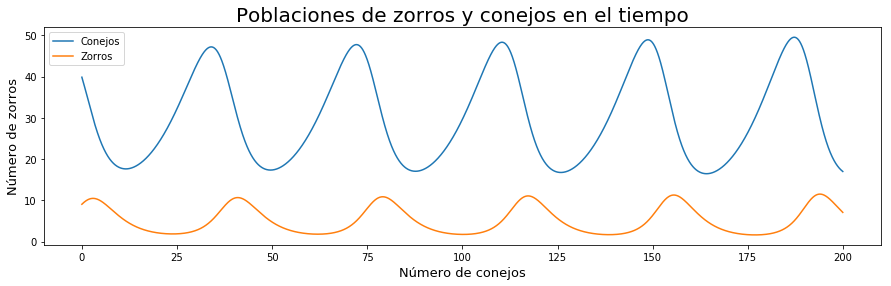

In [37]:
rk.plotXY_vs_t()
plt.legend()
plt.title("Poblaciones de zorros y conejos en el tiempo", fontsize=20)
plt.xlabel("Número de conejos", fontsize=13)
plt.ylabel("Número de zorros", fontsize=13) 

En la figura se puede apreciar que las poblaciones de ambas especies varían periódicamente a lo largo de los años de acuerdo a su mutua influencia. El número variable de depredadores determina el número de presas y viceversa. En consecuencia, en los períodos de tiempo en que la población de zorros incrementa, la de conejos disminuye; lo que conlleva a su vez a una disminución del número de zorros (por escasez de presas para alimentarse). Ante la disminución de depredadores, la tasa de crecimiento de los conejos se ve favorecida, por lo cual se presentan picos grandes. Este crecimiento favorece a su vez al incremento de zorros y así se establece entonces una suerte de círculo vicioso entre estas poblaciones mutuamente influenciadas que comparten el mismo nicho ecológico. 

El hecho de que el incremento de depredadores produzca una disminución en el número de presas, con una consecuente disminución del número de depredadors; y que el incremento en el número de presas produzca un aumento del número de depredadores se ve reflejado en el desfasaje existente entre las curvas representativas de cada población.

**c)** Graficá con los mismos resultados del punto **a)**, $R(t)$ vs. $F(t)$, y comtentá los resultados.


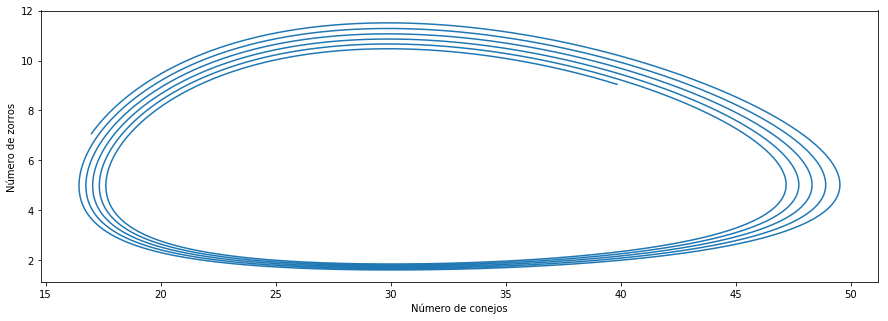

In [187]:
rk.plotXvsY()


**d)** Reflexioná sobre los significados biológicos de cada uno de los términos y coeficientes ($a$, $b$, $c$ y $d$) de las ecuaciones y analizá el diagrama de fase, con sus puntos fijos. Realizá un diagrama de flujo.


#### Significado biológico:

$(1)\ R'(t) = a\ R(t) - b\ R(t)\ F(t)$

$(2)\ F'(t) = -c\ F(t) + d\ R(t)\ F(t)$

Si consideráramos nula la interacción entre ambas especies, en que idealmente no compartirían el mismo nicho ecológico, los segundos términos de las ecuaciones $(1)$ y $(2)$ serían nulos, y tendríamos el siguiente sistema.

$(3)\ R'(t) = a\ R(t) $

$(4)\ F'(t) = -c\ F(t) $

En él se puede ver que la población de conejos, en ausencia de zorros, crecería indefinidamente en el tiempo, asumiendo la presencia de suficientes vegetales para su crecimiento. En cambio, la población de zorros, en ausencia de su presa, decrecería hasta extinguirse. Por lo tanto, los coeficientes $a$ y $c$ expresan el crecimiento de cada una de las poblaciones en ausencia de la especie competidora.

Por otra parte, los segundos términos expresan la interacción que se establece entre las dos especies al compartir el nicho. Dado que los conejos son la presa, el coeficiente que modela esta relación para esta especie es negativo, porque la presencia de zorros implicará una reducción en su número. Por el contrario, para la población de zorros es positivo, dado que la disponibildad de presas favorece su crecimiento. Luego, el coeficiente $b$ modela el decremento de la población de conejos en presencia de su depredador; mientras que el coeficiente $d$ modela el incremento de la población de zorros en presencia de su presa.

#### Análisis de puntos fijos

En primer lugar, busco todos los puntos fijos de acuerdo al sistema de ecuaciones

$0 = 0.1\ R(t) - 0.02\ R(t)\ F(t)$

$0 = -0.3\ F(t) + 0.01\ R(t)\ F(t)$

cuyas soluciones son:$(0,\ 0)$ y $(30,\ 5)$

In [77]:
from math import sqrt
# A valuado en (0,0)
A = np.array([[0.1, 0], [0, -0.3]])

eigVals, eigVect = np.linalg.eig(A)
_lambda1 = eigVals[0]
_lambda2 = eigVals[1]
print("Autovalores para el punto fijo (0,0): ", _lambda1, _lambda2)

# A valuado en (30,5)
A = np.array([[0, -0.6], [0.05, 0]])

eigVals, eigVect = np.linalg.eig(A)
_lambda1 = eigVals[0]
_lambda2 = eigVals[1]
print("Autovalores para el punto fijo (30,5): ", _lambda1, _lambda2)



Autovalores para el punto fijo (0,0):  0.1 -0.3
Autovalores para el punto fijo (30,5):  0.17320508075688773j -0.17320508075688773j


Luego, los autovalores para el punto fijo $(0,0)$ son $\lambda^+=0.1$ y $\lambda^-=-0.3$ y para el punto fijo $(30,5)$ son $\lambda^+=0.17\ i$ y $\lambda^-=-0.17\ i$ 

## Referencias

Chapra, Métodos numéricos para ingenieros

